In [2]:
from datasets import load_dataset
from collections import Counter
from matplotlib import pyplot as plt

In [4]:
fairytale_data = (
    load_dataset("GEM/FairytaleQA", split="train+validation+test")
    .filter(lambda x: x["ex_or_im"] == "explicit")
    .select_columns(["content", "target"])
    .rename_columns({"content": "source"})
)

C:\Users\omarz\Documents\University\mmqg\.venv\lib\site-packages\datasets\load.py:1429: FutureWarning: The repository for GEM/FairytaleQA contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/GEM/FairytaleQA
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [5]:
dataset_count = fairytale_data.shape[0]
dataset_count

7880

In [6]:
def add_unigram(example):
    example["unigram"] = " ".join(example["target"].split(" ")[:1])
    return example

leading_unigram = fairytale_data.map(add_unigram)

unigram_leading_word_counts = Counter(leading_unigram["unigram"])

most_common_bigram_leading_words = unigram_leading_word_counts.most_common(10)
print(f"{'Unigram': <20}{'Percentage': <10}")
print("-" * 30)
for word, count in most_common_bigram_leading_words:
    p = count / dataset_count * 100
    print(f"{word: <20}{p:.2f}%")


Map:   0%|          | 0/7880 [00:00<?, ? examples/s]

Unigram             Percentage
------------------------------
what                48.35%
why                 20.32%
how                 11.69%
who                 11.48%
where               7.47%
when                0.25%
which               0.15%
whose               0.11%
to                  0.05%
on                  0.03%


## Most Frequent Leading Bigram

In [7]:
from collections import Counter

def add_bigram(example):
    example["bigram"] = " ".join(example["target"].split(" ")[:2])
    return example

leading_bigram = fairytale_data.map(add_bigram)

bigram_leading_word_counts = Counter(leading_bigram["bigram"])

most_common_bigram_leading_words = bigram_leading_word_counts.most_common(10)
print(f"{'Bigram': <20}{'Percentage': <10}")
print("-" * 30)
for word, count in most_common_bigram_leading_words:
    p = count/dataset_count*100
    print(f"{word: <20}{p:.2f}%")

Map:   0%|          | 0/7880 [00:00<?, ? examples/s]

Bigram              Percentage
------------------------------
what did            28.49%
why did             13.26%
what happened       9.97%
how did             8.52%
where did           6.07%
why was             3.76%
who was             3.44%
what was            3.27%
who did             2.60%
what will           2.39%


## Distribution of Target and Source Length

In [ ]:
from transformers import T5Tokenizer, BartTokenizer


bart_tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')
t5_tokenizer = T5Tokenizer.from_pretrained('t5-small')


In [15]:
def add_target_tokens(example):
    example["bart"] = len(bart_tokenizer.tokenize(example["target"]))
    example["t5"] = len(t5_tokenizer.tokenize(example["target"]))
    return example

question_length = fairytale_data.map(add_target_tokens)
question_length[0]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Map:   0%|          | 0/7880 [00:00<?, ? examples/s]

{'source': 'once upon a time there was a king who went forth into the world and fetched back a beautiful queen . and after they had been married a while god gave them a little daughter . then there was great rejoicing in the city and throughout the country , for the people wished their king all that was good , since he was kind and just . while the child lay in its cradle , a strange - looking old woman entered the room , and no one knew who she was nor whence she came . the old woman spoke a verse over the child , and said that she must not be allowed out under the open sky until she were full fifteen years of age , since otherwise the mountain troll would fetch her . when the king heard this he took her words to heart , and posted guards to watch over the little princess so that she would not get out under the open sky .',
 'target': 'why was there great rejoicing in the city and throughout the country ?',
 'bart': 14,
 't5': 18}

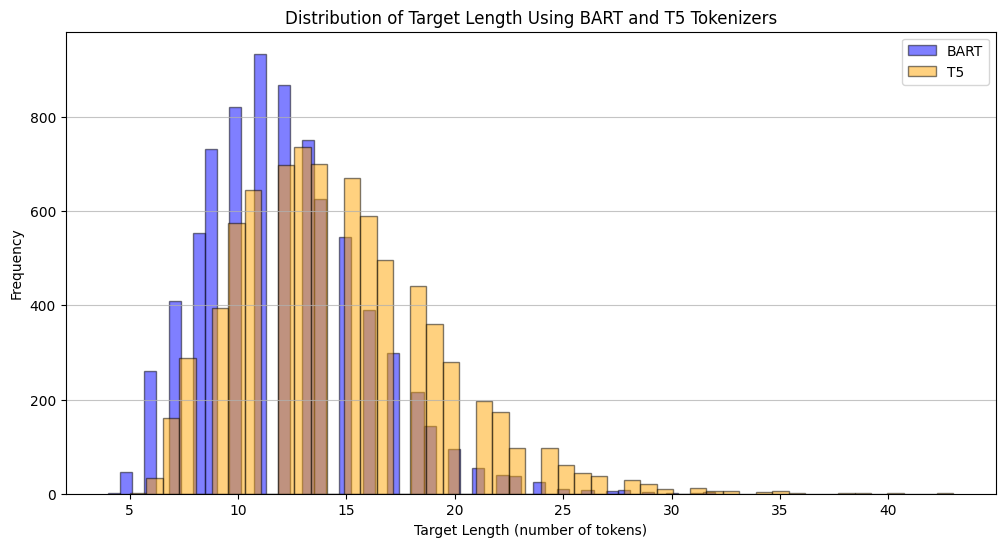

In [21]:
plt.figure(figsize=(12, 6))
plt.hist(question_length["bart"], bins=50, alpha=0.5, label='BART', color='blue', edgecolor='black')
plt.hist(question_length["t5"], bins=50, alpha=0.5, label='T5', color='orange', edgecolor='black')
plt.title('Distribution of Target Length Using BART and T5 Tokenizers')
plt.xlabel('Target Length (number of tokens)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

In [17]:
def add_source_tokens(example):
    example["bart"] = len(bart_tokenizer.tokenize(example["source"]))
    example["t5"] = len(t5_tokenizer.tokenize(example["source"]))
    return example

source_length = fairytale_data.map(add_source_tokens)
source_length[0]

Map:   0%|          | 0/7880 [00:00<?, ? examples/s]

{'source': 'once upon a time there was a king who went forth into the world and fetched back a beautiful queen . and after they had been married a while god gave them a little daughter . then there was great rejoicing in the city and throughout the country , for the people wished their king all that was good , since he was kind and just . while the child lay in its cradle , a strange - looking old woman entered the room , and no one knew who she was nor whence she came . the old woman spoke a verse over the child , and said that she must not be allowed out under the open sky until she were full fifteen years of age , since otherwise the mountain troll would fetch her . when the king heard this he took her words to heart , and posted guards to watch over the little princess so that she would not get out under the open sky .',
 'target': 'why was there great rejoicing in the city and throughout the country ?',
 'bart': 173,
 't5': 211}

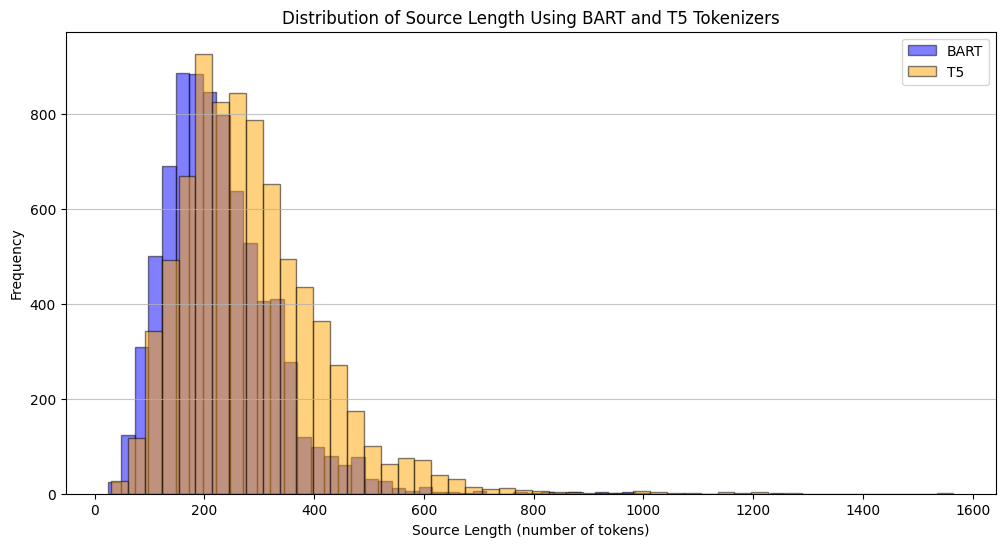

In [18]:
plt.figure(figsize=(12, 6))
plt.hist(source_length["bart"], bins=50, alpha=0.5, label='BART', color='blue', edgecolor='black')
plt.hist(source_length["t5"], bins=50, alpha=0.5, label='T5', color='orange', edgecolor='black')
plt.title('Distribution of Source Length Using BART and T5 Tokenizers')
plt.xlabel('Source Length (number of tokens)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()